In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os, sys
import random
import networkx as nx
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import SAD as sad

0.007305660812388473 9.954604270365941e-05


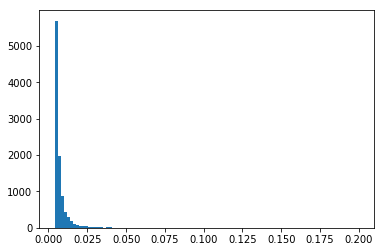

In [20]:
N = 10000
# produce activities 
from scipy.stats import norm,pareto
b = 2.1
dist = pareto(b).rvs(100000)
dist = np.random.choice(dist,N)
act = dict(zip(range(N),dist/(5.0*np.max(dist))))
plt.hist(act.values(),100)
mu, v  = np.mean(act.values()), np.mean(np.array(act.values())**2)
print mu, v

# Memoryless graph

In [28]:
N = 1000
T = 500
k = 4

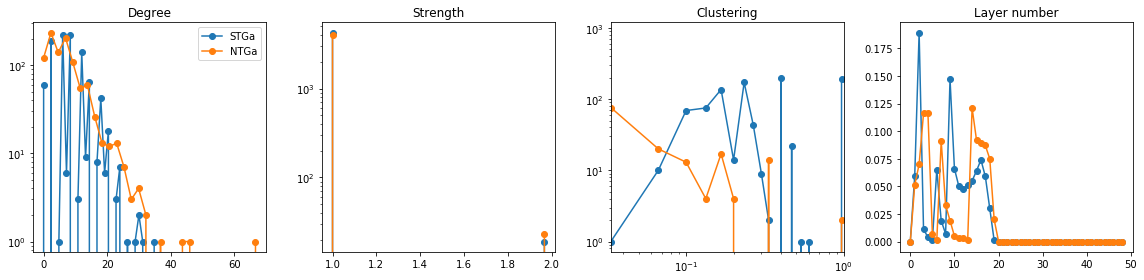

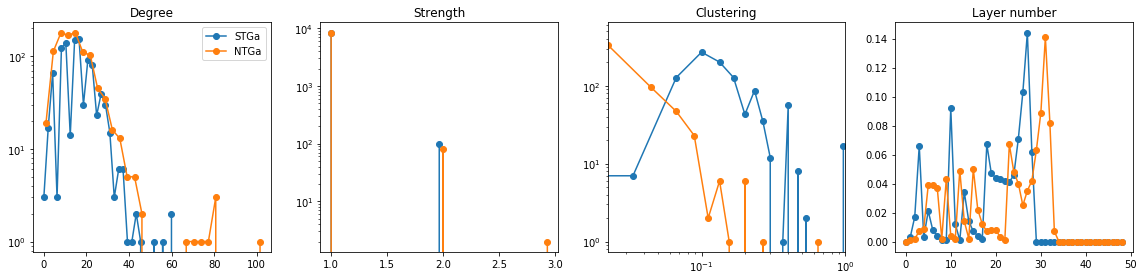

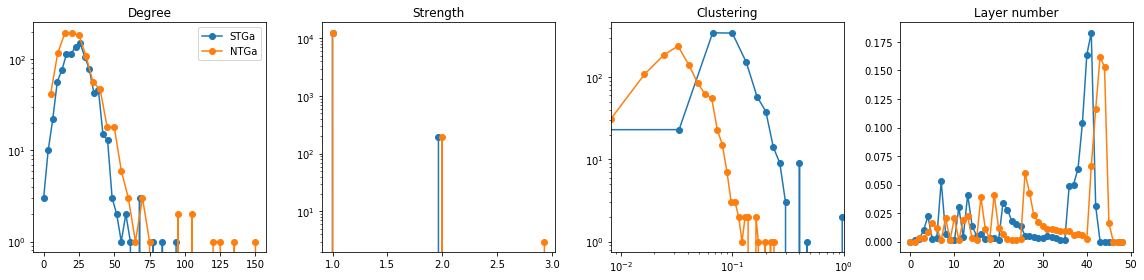

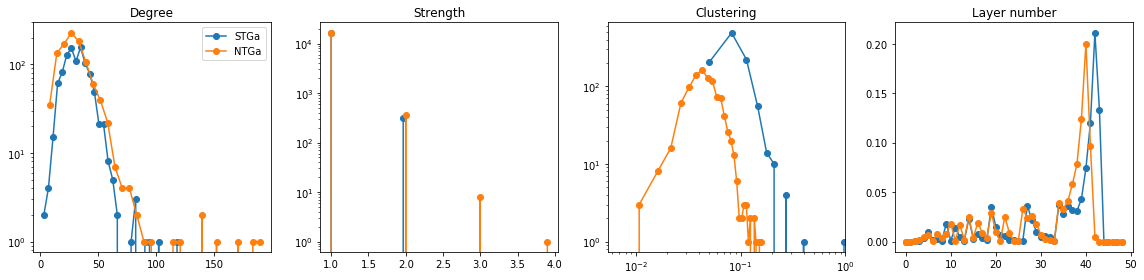

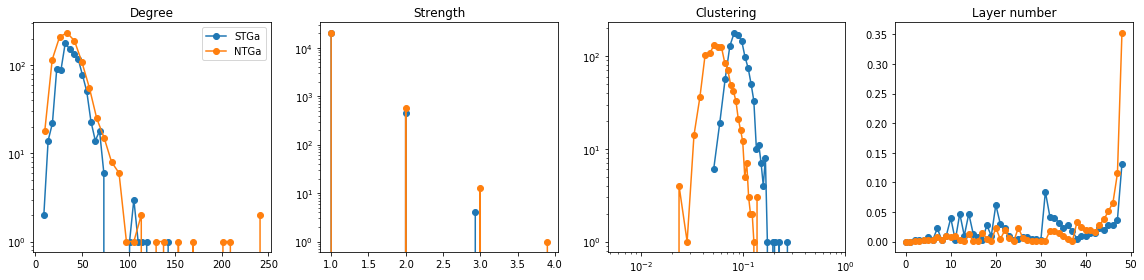

In [29]:
STG = sad.temporal_graph_creation(N,T,k,act,mode='simplicial')
NTG = sad.temporal_graph_creation(N,T,k,act,mode='network')

STGa = {}
NTGa = {}
ts = [100,200,300,400,499]#700,800,900]
for t in ts:
    STGa[t] = sad.aggregate_graph(STG,t)
    NTGa[t] = sad.aggregate_graph(NTG,t)

pl = 4 
for t in ts:
    fig = plt.figure(figsize=(16,4))
    plt.subplot(1,pl,1)
    aa, bb = np.histogram(STGa[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='STGa')
    aa, bb = np.histogram(NTGa[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='NTGa')
    plt.legend(loc=0)
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Degree')

    plt.subplot(1,pl,2)
    aa, bb = np.histogram(nx.get_edge_attributes(STGa[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.get_edge_attributes(NTGa[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Strength')

    plt.subplot(1,pl,3)
    aa, bb = np.histogram(nx.clustering(STGa[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.clustering(NTGa[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Clustering')
    plt.xlim(0,1)

    plt.subplot(1,pl,4)
    coreness, layerness = sad.onion_decomposition(STGa[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    coreness, layerness = sad.onion_decomposition(NTGa[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    plt.title('Layer number')

    plt.tight_layout()

In [17]:
for t in STGa:
    nx.write_edgelist(STGa[t],'../data/phom-networks/graphs/STGa-'+str(t)+'.edges',data=['weight'])
    nx.write_edgelist(NTGa[t],'../data/phom-networks/graphs/NTGa-'+str(t)+'.edges',data=['weight'])

Text(0.5,0,u'Clustering NTG')

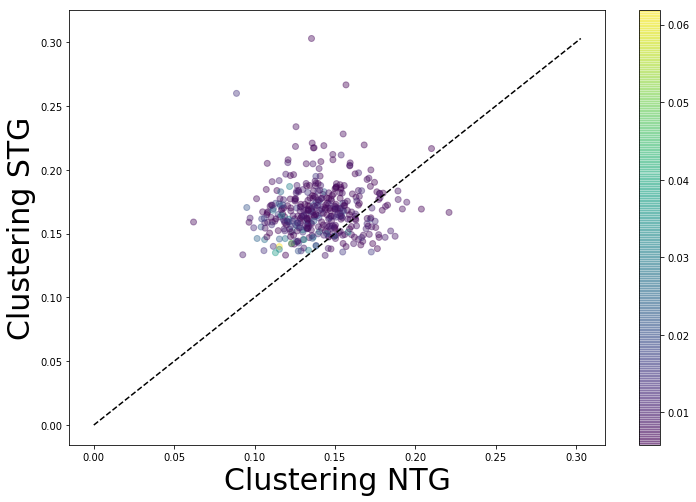

In [8]:
x = nx.clustering(NTGa[400]).values()
y = nx.clustering(STGa[400]).values()
z = act.values()[:N]
M = np.max([np.max(x), np.max(y)])

fig = plt.figure(figsize=(12,8))
plt.scatter(x,y,c=z,alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Clustering STG',fontsize=30)
plt.xlabel('Clustering NTG', fontsize=30)


# Memory graph 

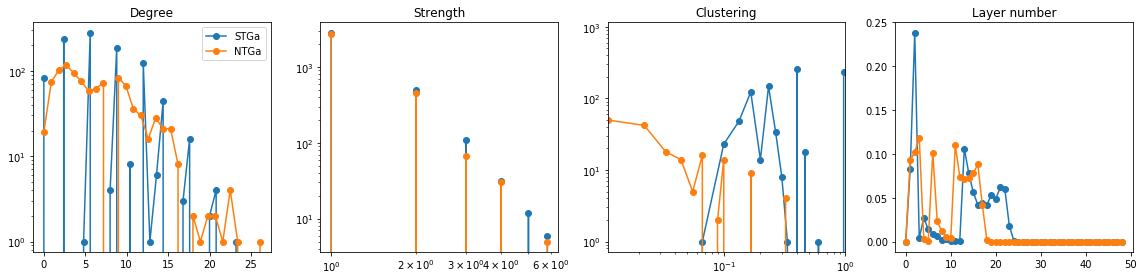

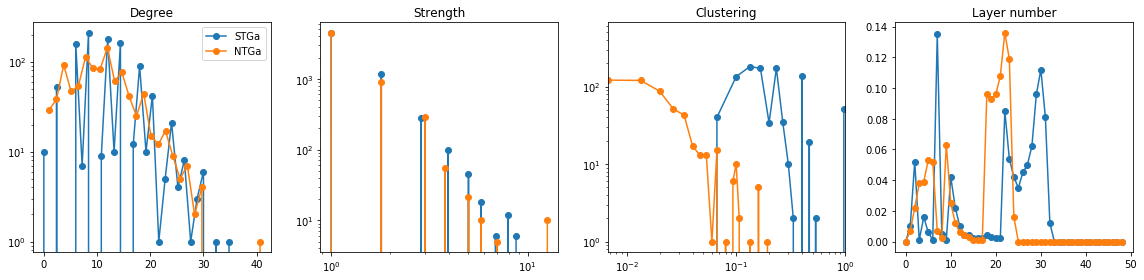

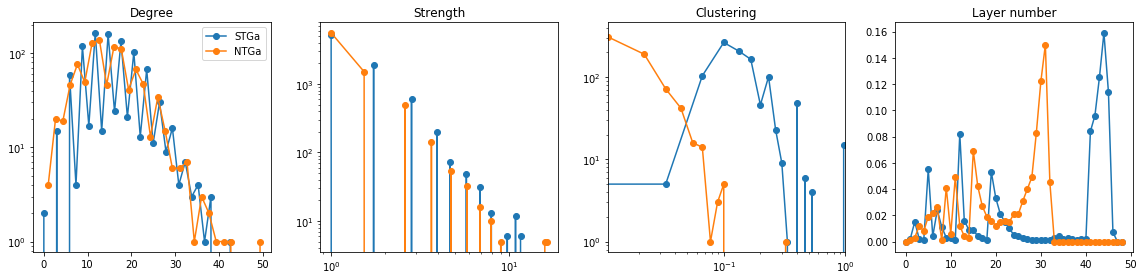

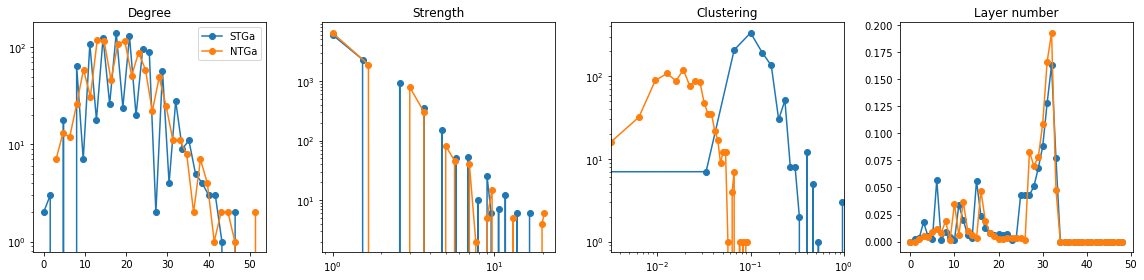

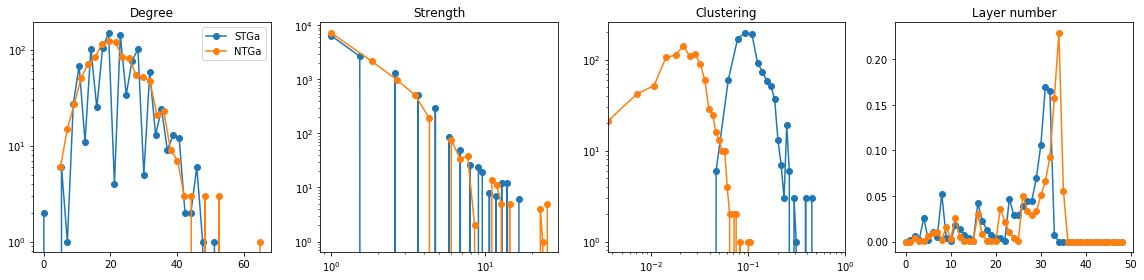

In [30]:
STGm = sad.memory_temporal_graph_creation(N,T,k,act,'simplicial',alpha=1)
NTGm = sad.memory_temporal_graph_creation(N,T,k,act,'network',alpha=1)

pl = 4;
STGam = {}
NTGam = {}
for t in ts:
    STGam[t] = sad.aggregate_graph(STGm,t)
    STGam[t].remove_edges_from(STGam[t].selfloop_edges())
    NTGam[t] = sad.aggregate_graph(NTGm,t)
    NTGam[t].remove_edges_from(NTGam[t].selfloop_edges())

for t in ts:
    fig = plt.figure(figsize=(16,4))
    plt.subplot(1,pl,1)
    aa, bb = np.histogram(STGam[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='STGa')
    aa, bb = np.histogram(NTGam[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='NTGa')
    plt.legend(loc=0)
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Degree')

    plt.subplot(1,pl,2)
    aa, bb = np.histogram(nx.get_edge_attributes(STGam[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.get_edge_attributes(NTGam[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Strength')

    plt.subplot(1,pl,3)
    aa, bb = np.histogram(nx.clustering(STGam[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.clustering(NTGam[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Clustering')
    plt.xlim(0,1)
    
    plt.subplot(1,pl,4)
    coreness, layerness = sad.onion_decomposition(STGam[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    coreness, layerness = sad.onion_decomposition(NTGam[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    plt.title('Layer number')


    plt.tight_layout()

In [31]:
for t in STGa:
    nx.write_edgelist(STGam[t],'../data/phom-networks/graphs/STGa-mem-'+str(t)+'.edges',data=['weight'])
    nx.write_edgelist(NTGam[t],'../data/phom-networks/graphs/NTGa-mem-'+str(t)+'.edges',data=['weight'])

Text(0.5,0,u'Clustering NTG')

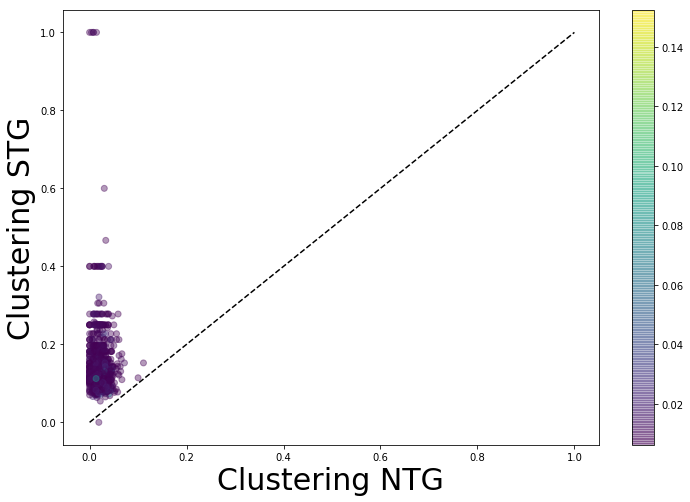

In [40]:
x = nx.clustering(NTGa[400]).values()
y = nx.clustering(STGa[400]).values()
z = act.values()[:N]
M = np.max([np.max(x), np.max(y)])

fig = plt.figure(figsize=(12,8))
plt.scatter(x,y,c=z,alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Clustering STG',fontsize=30)
plt.xlabel('Clustering NTG', fontsize=30)


Text(0.5,0,u'Layer NTG')

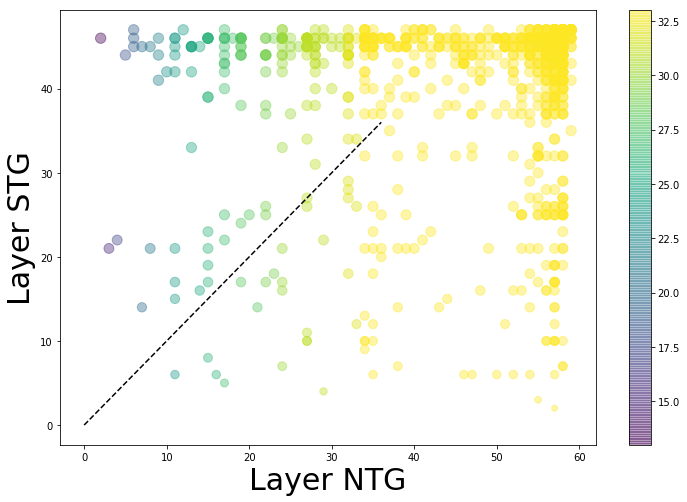

In [95]:
x, x0 = sad.onion_decomposition(NTGa[400])
y, y0 = sad.onion_decomposition(STGa[400])
z = act.values()[:N]
M = np.max([np.max(x.values()), np.max(y.values())])

fig = plt.figure(figsize=(12,8))
plt.scatter(x0.values(),y0.values(),c=x.values(),s=3*np.array(y.values()),alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Layer STG',fontsize=30)
plt.xlabel('Layer NTG', fontsize=30)
